In [1]:
from AutoEncoderRGB import AutoEncoderRGB
import torch
import torch.nn as nn
from dataprepRGB import test_loader, train_loader
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

# We will use the function below to evaluate model performance

In [2]:
def evaluate(data):
    predictions = []
    target = []
    losses = []
    
    model.eval()
    with torch.no_grad():
        for inputs, orig in data:
            output = model(inputs)
            test_losses = loss_fn(output, inputs)
            losses.extend(test_losses.sum(dim=1).detach().cpu().numpy())
            predictions.extend(output.cpu().numpy())
            target.extend(orig.cpu().numpy())

    return predictions, target, losses

## Loading model and specifying the loss function

In [3]:
loss_fn = nn.MSELoss(reduction='none')
model = AutoEncoderRGB()
model.load_state_dict(torch.load('model_final.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

## Making predictions

In [4]:
predictions_test, target_test,  _ = evaluate(test_loader)

In [23]:
rows = 10
columns = 2

## Plotting sample target images and their predictions from the test set

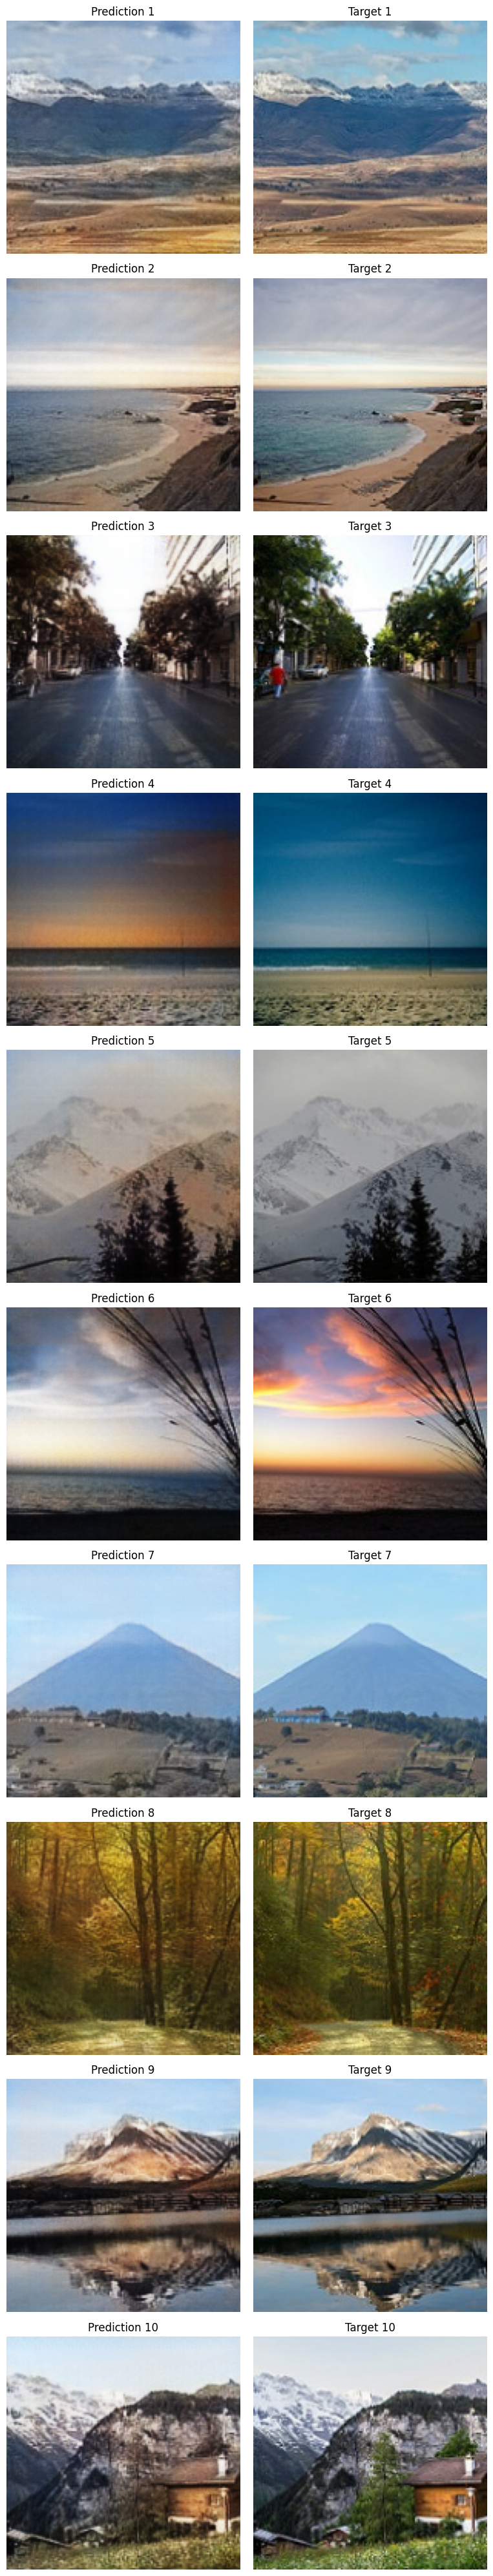

In [32]:
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(8, 4*rows))
for i in range(rows):
    axes[i, 0].imshow(predictions_test[i].transpose(1, 2, 0))
    axes[i, 0].set_title(f"Prediction {i+1}")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(target_test[i].transpose(1, 2, 0))
    axes[i, 1].set_title(f"Target {i+1}")
    axes[i, 1].axis('off') 

plt.tight_layout()
plt.show()